## 网格搜索

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

sk_knn_clf = KNeighborsClassifier(n_neighbors=4, weights="uniform")
sk_knn_clf.fit(X_train, y_train)
sk_knn_clf.score(X_test, y_test)

0.9916666666666667

## Grid Search

In [10]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1, 11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1, 11)],
        'p':[i for i in range(1, 6)]
    }
]

In [11]:
knn_clf = KNeighborsClassifier()

In [12]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,param_grid)

In [13]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 1min 15s


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
grid_search.best_score_

0.9860820751064653

In [16]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [17]:
knn_clf = grid_search.best_estimator_

In [19]:
knn_clf.score(X_test, y_test)

0.9833333333333333

In [21]:
%%time
grid_search = GridSearchCV(knn_clf,param_grid, n_jobs=8, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 192 tasks      | elapsed:    8.8s


Wall time: 16.7 s


[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:   16.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=8,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

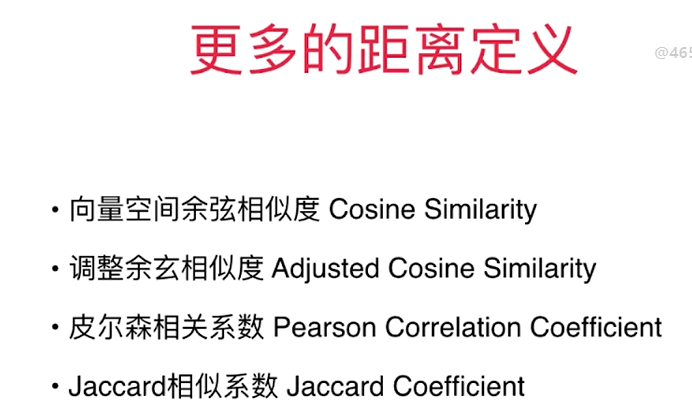